<a href="https://colab.research.google.com/github/mahima-c/deep-learning/blob/main/Estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**linear regression**

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

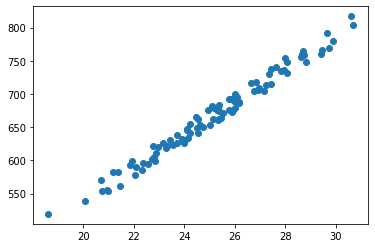

In [ ]:
#Generate a random data
np.random.seed(0)
area = 2.5 * np.random.randn(100) + 25
price = 25 * area + 5 + np.random.randint(20,50, size = len(area))
data = np.array([area, price])
data = pd.DataFrame(data = data.T, columns=['area','price'])
plt.scatter(data['area'], data['price'])
plt.show()

Now, we calculate the two regression coefficients using the equations we defined. You can see the result is very much near the linear relationship we have simulated:

In [ ]:
W = sum(price*(area-np.mean(area))) / sum((area-np.mean(area))**2)
b = np.mean(price) - W*np.mean(area)
print("The regression coefficients are", W,b)

The regression coefficients are 24.815544052284988 43.4989785533412


In [ ]:
y_pred = W * area + b


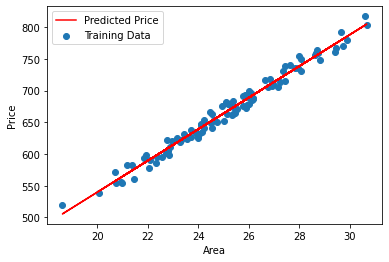

In [ ]:
plt.plot(area, y_pred, color='red',label="Predicted Price")
plt.scatter(data['area'], data['price'], label="Training Data")
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend()

**Multiple linear regression**


The preceding example was simple, but that is rarely the case. In most problems, the dependent variables depend upon multiple independent variables. Multiple linear regression finds a linear relationship between the many independent input variables (X) and the dependent output variable (Y), such that they satisfy the predicted Y value of the form:

Yhat = WTX + b

Where X = {x1, x2, ..., xn} are the n independent input variables, and W = { w1, w2, ...wn} are the linear coefficients, with b as the bias term.

As before the linear coefficients W's are estimated using the method of least squares, that is, minimizing the sum of squared differences between predicted values (Yhat) and observed values (Y). Thus, we try to minimize the loss function:


Where the sum is over all the training samples. As you might have guessed, now instead of two we will have n+1 equations, which we will need to simultaneously solve. An easier alternative will be to use the TensorFlow Estimator API. We will learn shortly how to use the TensorFlow Estimator API.

**Multivariate linear regression**


There can be cases where the independent variables affect more than one dependent variable. This is the case of multivariate linear regression. Mathematically, a multivariate regression model can be represented as:


Where  and . The term  represents the jth predicted output value corresponding to the ith input sample, w represents the regression coefficients, and xik is the kth feature of the ith input sample. The number of equations needed to solve in this case will now be n × m. While we can solve these equations using matrices, the process will be computationally expensive as it will involve calculating inverse and determinants. An easier way would be to use the gradient descent with the sum of least square error as the loss function and to use one of the many optimizers that the TensorFlow API includes.

In the next section we will delve deeper into TensorFlow Estimators, a versatile higher-level API to develop your model with ease.

TensorFlow Estimators


MNIST using TensorFlow Estimator API


Let us build a simple TensorFlow estimator with a simple dataset for a multiple regression problem. We continue with the home price prediction, but now have two features, that is, we are considering two independent variables: the area of the house and its type (bungalow or apartment) on which we presume our price should depend:

We import the necessary modules. We will need TensorFlow and its feature_column module. Since our dataset contains both numeric and categorical data, we need the functions to process both types of data:

TensorFlow Estimators
TensorFlow provides Estimators as higher-level APIs, to provide scalable and production-oriented solutions. They take care of all behind-the-scene activities such as creating computational graphs, initializing the variables, training the model, saving checkpoints, and logging TensorBoard files. TensorFlow provides two types of Estimators:

Canned Estimators: These are premade Estimators available in the TensorFlow estimator module. These are models in a box; you just pass them the input features and they are ready to use. Some examples are Linear Classifier, Linear Regressor, DNN Classifier, and so on.
Custom Estimators: Users can also create their own estimators from the models they build in TensorFlow Keras. These are user-defined Estimators.
Before being able to use TensorFlow Estimator let us understand two important components of the Estimator pipeline:

Feature columns
The feature_column module of TensorFlow 2.0 acts as a bridge between your input data and the model. The input parameters to be used by the estimators for training are passed as feature columns. They are defined in TensorFlow feature_column and specify how the data is interpreted by the model. To create feature columns we will need to call functions from tensorflow.feature_columns. There are nine functions available in feature column:

categorical_column_with_identity: Here each category is one-hot encoded, and thus has a unique identity. This can be used for numeric values only.
categorical_column_with_vocabulary_file: This is used when the categorical input is a string and the categories are given in a file. The string is first converted to a numeric value and then one-hot encoded.
categorical_column_with_vocabulary_list: This is used when the categorical input is a string and the categories are explicitly defined in a list. The string is first converted to a numeric value and then one-hot encoded.
categorical_column_with_hash_bucket: In case the number of categories is very large, and it is not possible to one-hot encode, we use hashing.
crossed_column: When we want to use two columns combined as one feature, for example, in the case of geolocation-based data it makes sense to combine longitude and latitude values as one feature.
numeric_column: Used when the feature is a numeric, it can be a single value or even a matrix.
indicator_column: We do not use this directly. Instead, it is used with the categorical column, but only when the number of categories is limited and can be represented as one-hot encoded.
embedding_column: We do not use this directly. Instead, it is used with the categorical column, but only when the number of categories is very large and cannot be represented as one-hot encoded.
bucketized_column: This is used when, instead of a specific numeric value, we split the data into different categories depending upon its value.
The first six functions inherit from the Categorical Column class, the next three inherit from the Dense Column class, and the last one inherits from both classes. In the following example we will use numeric_column and categorical_column_with_vocabulary_list functions.

Input functions
The data for training, evaluation, as well as prediction, needs to be made available through an input function. The input function returns a tf.data.Dataset object; the object returns a tuple containing features and labels.

In [ ]:
import tensorflow as tf
from tensorflow import feature_column as fc
numeric_column = fc.numeric_column 
categorical_column_with_vocabulary_list = fc.categorical_column_with_vocabulary_list

In [ ]:
featcols = [
tf.feature_column.numeric_column("area"),
tf.feature_column.categorical_column_with_vocabulary_list("type",["bungalow","apartment"])
]

In [ ]:
model = tf.estimator.LinearRegressor(featcols)
model.train(train_input_fn, steps=200)

In [ ]:
def predict_input_fn():
    features = {"area":[1500,1800],
                "type":["house","apt"]}
    return features
predictions = model.predict(predict_input_fn)
print(next(predictions))
print(next(predictions))

Predicting house price using linear regression


In [1]:
import tensorflow as tf
import pandas as pd
import tensorflow.feature_column as fc
from tensorflow.keras.datasets import boston_housing

In [2]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()


57344/57026 [==============================] - 0s 0us/step


In [3]:
features = ['CRIM', 'ZN', 
            'INDUS','CHAS','NOX','RM','AGE',
            'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
x_train_df = pd.DataFrame(x_train, columns= features)
x_test_df = pd.DataFrame(x_test, columns= features)
y_train_df = pd.DataFrame(y_train, columns=['MEDV'])
y_test_df = pd.DataFrame(y_test, columns=['MEDV'])
x_train_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [4]:
feature_columns = []
for feature_name in features:
        feature_columns.append(fc.numeric_column(feature_name, dtype=tf.float32))

In [5]:
feature_columns

[NumericColumn(key='CRIM', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='ZN', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='INDUS', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='CHAS', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='NOX', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='RM', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='AGE', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='DIS', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='RAD', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='TAX', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='PTRATIO'

We create the input function for the estimator. The function returns the tf.Data.Dataset object with a tuple: features and labels in batches. Use it to create train_input_fn and val_input_fn:

In [8]:
def estimator_input_fn(df_data, df_label, epochs=10, shuffle=True, batch_size=32):
    def input_function():
        ds = tf.data.Dataset.from_tensor_slices((dict(df_data), df_label))
        if shuffle:
            ds = ds.shuffle(100)
        ds = ds.batch(batch_size).repeat(epochs)
        return ds
    return input_function
train_input_fn = estimator_input_fn(x_train_df, y_train_df)
val_input_fn = estimator_input_fn(x_test_df, y_test_df, epochs=1, shuffle=False)

Next we instantiate a LinearRegressor estimator; we train it using training data using train_input_fn, and find the result for the validation dataset by evaluating the trained model using val_input_fn:


In [9]:
linear_est = tf.estimator.LinearRegressor(feature_columns=feature_columns)
linear_est.train(train_input_fn, steps=100)
result = linear_est.evaluate(val_input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp5hg0aave', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initiali

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp5hg0aave/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 442.40405, step = 0
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 100...
INFO:tensorflow:Saving checkpoints for 100 into /tmp/tmp5hg0aave/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 100...
INFO:tensorflow:Loss for final step: 65.75012.
INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-01-06T16:12:23Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp5hg0aave/model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.27346s
INFO:tensorflow:Finished evaluation at 2021-01-06-16:12:23
INFO:tensorflow:Saving dict for global step 100: average_loss = 70.58704, global_step = 100, label/mean = 23.078432, loss = 85.98931, prediction/mean = 21.49143
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 100: /tmp/tmp5hg0aave/model.ckpt-100


In [10]:
# Let's make a prediction on it:
result = linear_est.predict(val_input_fn)
for pred,exp in zip(result, y_test[:32]):
    print("Predicted Value: ", pred['predictions'][0], "Expected: ", exp)

INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp5hg0aave/model.ckpt-100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Predicted Value:  2.845536 Expected:  7.2
Predicted Value:  22.109861 Expected:  18.8
Predicted Value:  20.862713 Expected:  19.0
Predicted Value:  21.559694 Expected:  27.0
Predicted Value:  21.435944 Expected:  22.2
Predicted Value:  20.532026 Expected:  24.5
Predicted Value:  28.213316 Expected:  31.2
Predicted Value:  24.358868 Expected:  22.9
Predicted Value:  19.696869 Expected:  20.5
Predicted Value:  22.085102 Expected:  23.2
Predicted Value:  8.476617 Expected:  18.6
Predicted Value:  21.737719 Expected:  14.5
Predicted Value:  21.872747 Expected:  17.8
Predicted Value:  21.837423 Expected:  50.0
Predicted Value:  16.931244 Expected:  20.8
Predicted Value:  23.524628 Expected:  24.3
Predicted Value:  19.481783 Expected:  24.2
Predicted Value:  20.0

Logistic regression


In [11]:
# # TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.4.0


In [12]:
# Load training and eval data
((train_data, train_labels),
(eval_data, eval_labels)) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [13]:
train_data = train_data/np.float32(255)
train_labels = train_labels.astype(np.int32)  
eval_data = eval_data/np.float32(255)
eval_labels = eval_labels.astype(np.int32)

In [14]:
# Use the feature_column module of TensorFlow to define numeric features of size 28×28:
feature_columns = [tf.feature_column.numeric_column("x", shape=[28, 28])]


Create the logistic regression estimator. We use a simple LinearClassifier. We encourage you to experiment with DNNClassifier as well:

In [15]:
classifier = tf.estimator.LinearClassifier(
    feature_columns=feature_columns,
    n_classes=10,
    model_dir="mnist_model/",
)

RuntimeError: ignored

In [ ]:
train_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
        x={"x": train_data},
        y=train_labels,
            batch_size=100,
            num_epochs=None,
            shuffle=True)

In [ ]:
classifier.train(input_fn=train_input_fn, steps=10)
